# Linear Regression using Pytorch


In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

epoch: 10, loss = 4436.2891
epoch: 20, loss = 3307.1057
epoch: 30, loss = 2490.6453
epoch: 40, loss = 1899.6421
epoch: 50, loss = 1471.3951
epoch: 60, loss = 1160.7847
epoch: 70, loss = 935.2979
epoch: 80, loss = 771.4719
epoch: 90, loss = 652.3560
epoch: 100, loss = 565.6882


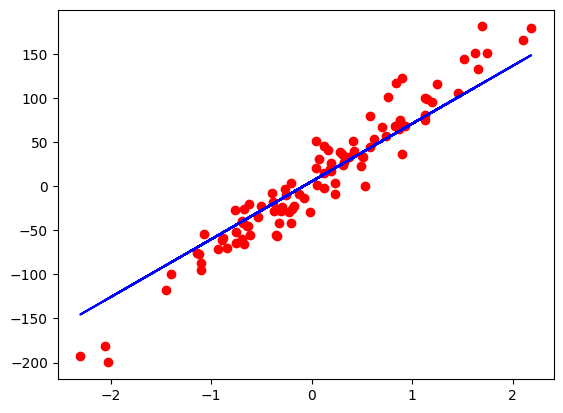

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y= y.view(y.shape[0],1)

n_sample, n_feature = X.shape

input_size = n_feature
output_size = 1
model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if(epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Logistic Regression using Pytorch

In [3]:
#preparing the data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# we scale our data using standard scalar that will scale our features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#we reshape the y to have one row and one column
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [5]:
#setting up the model
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
model = LogisticRegression(n_features)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
num_epochs = 200
for epoch in range(num_epochs):
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc:.4f}')

epoch: 10, loss = 0.5580
epoch: 20, loss = 0.4713
epoch: 30, loss = 0.4129
epoch: 40, loss = 0.3708
epoch: 50, loss = 0.3390
epoch: 60, loss = 0.3139
epoch: 70, loss = 0.2935
epoch: 80, loss = 0.2766
epoch: 90, loss = 0.2623
epoch: 100, loss = 0.2500
epoch: 110, loss = 0.2393
epoch: 120, loss = 0.2298
epoch: 130, loss = 0.2213
epoch: 140, loss = 0.2138
epoch: 150, loss = 0.2069
epoch: 160, loss = 0.2007
epoch: 170, loss = 0.1950
epoch: 180, loss = 0.1898
epoch: 190, loss = 0.1849
epoch: 200, loss = 0.1805
accuracy: 0.9211
